# RatInABox: Code for replicating figures in the paper 

### Figures relating to the two cases studies (reinforcement learning and path integration) can be found in their respective example scripts

### Figure 1abc 

In [1]:
sys.path.append('../')
import ratinabox
from ratinabox import *

#I use a plotting package to format and save figures
import tomplotlib.tomplotlib as tpl
tpl.figureDirectory = "../figures/"
tpl.setColorscheme(colorscheme=2)

from tqdm import tqdm
from matplotlib import rcParams, rc
rcParams['figure.dpi']= 300

%load_ext autoreload
%autoreload 2

'../figures/220702/BVCs_2305'

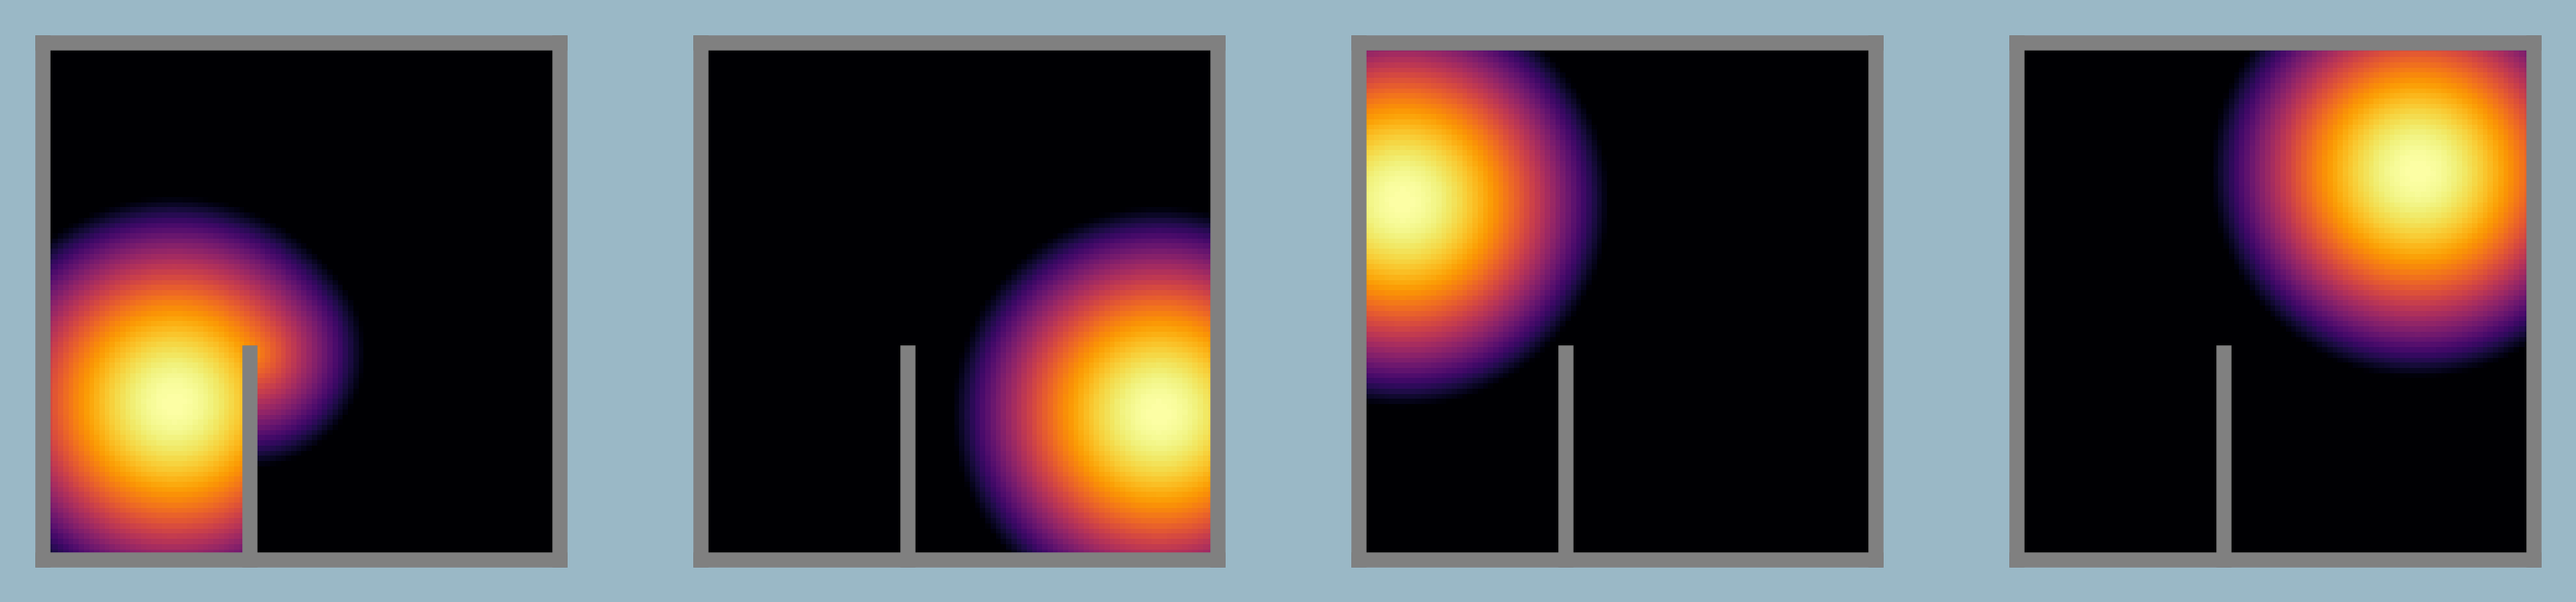

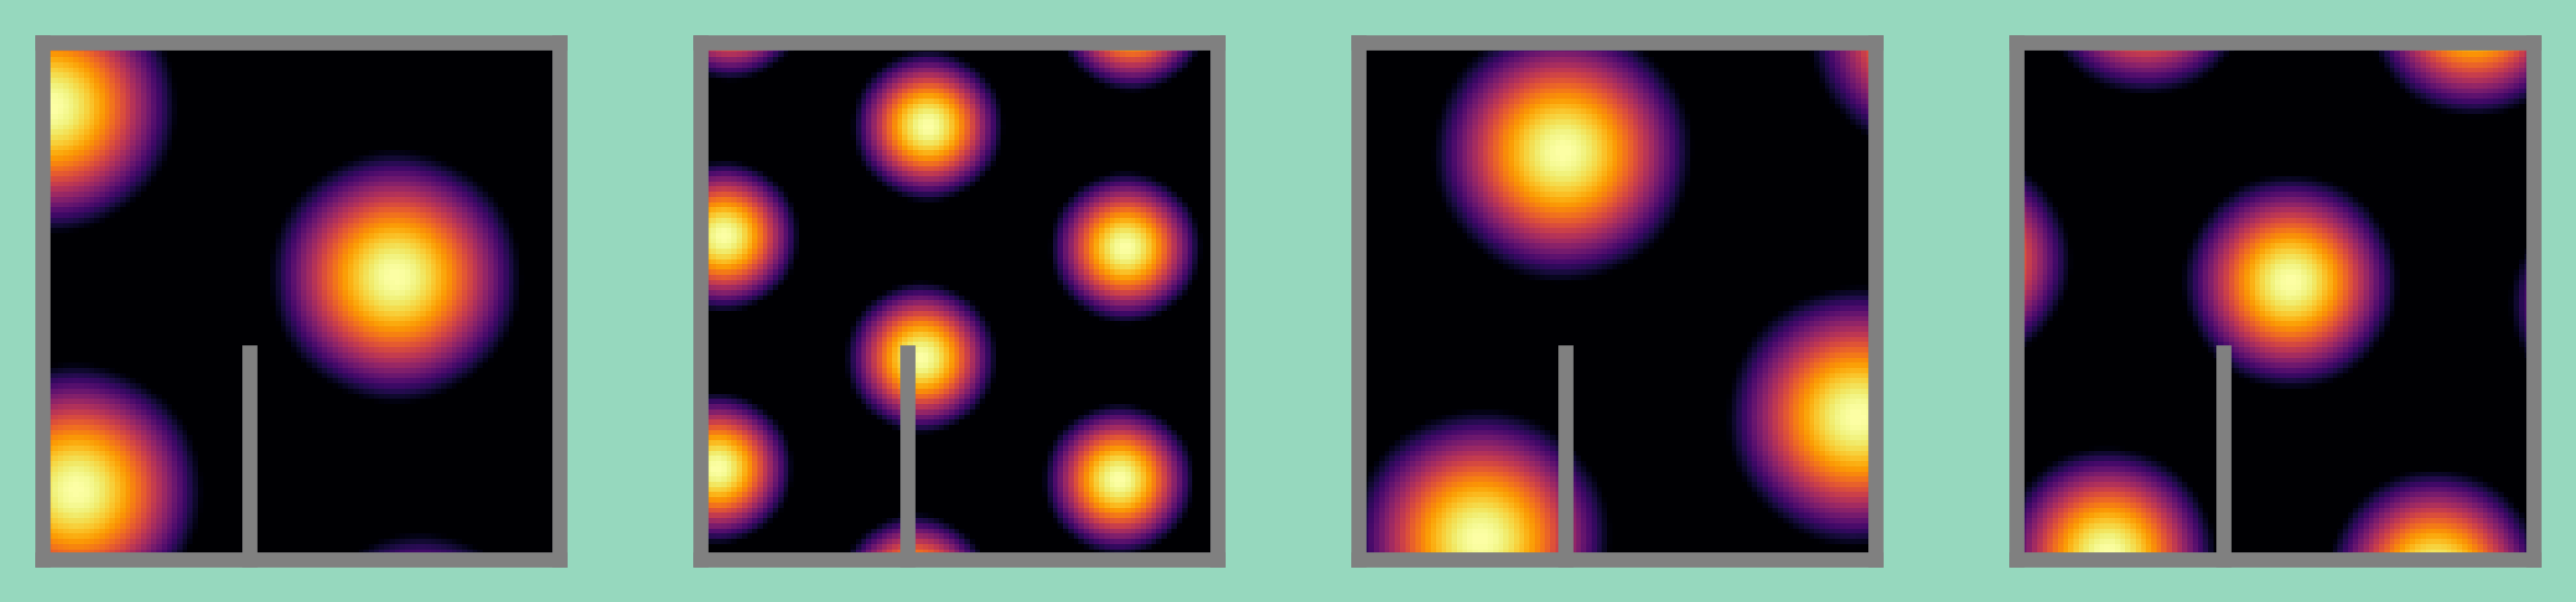

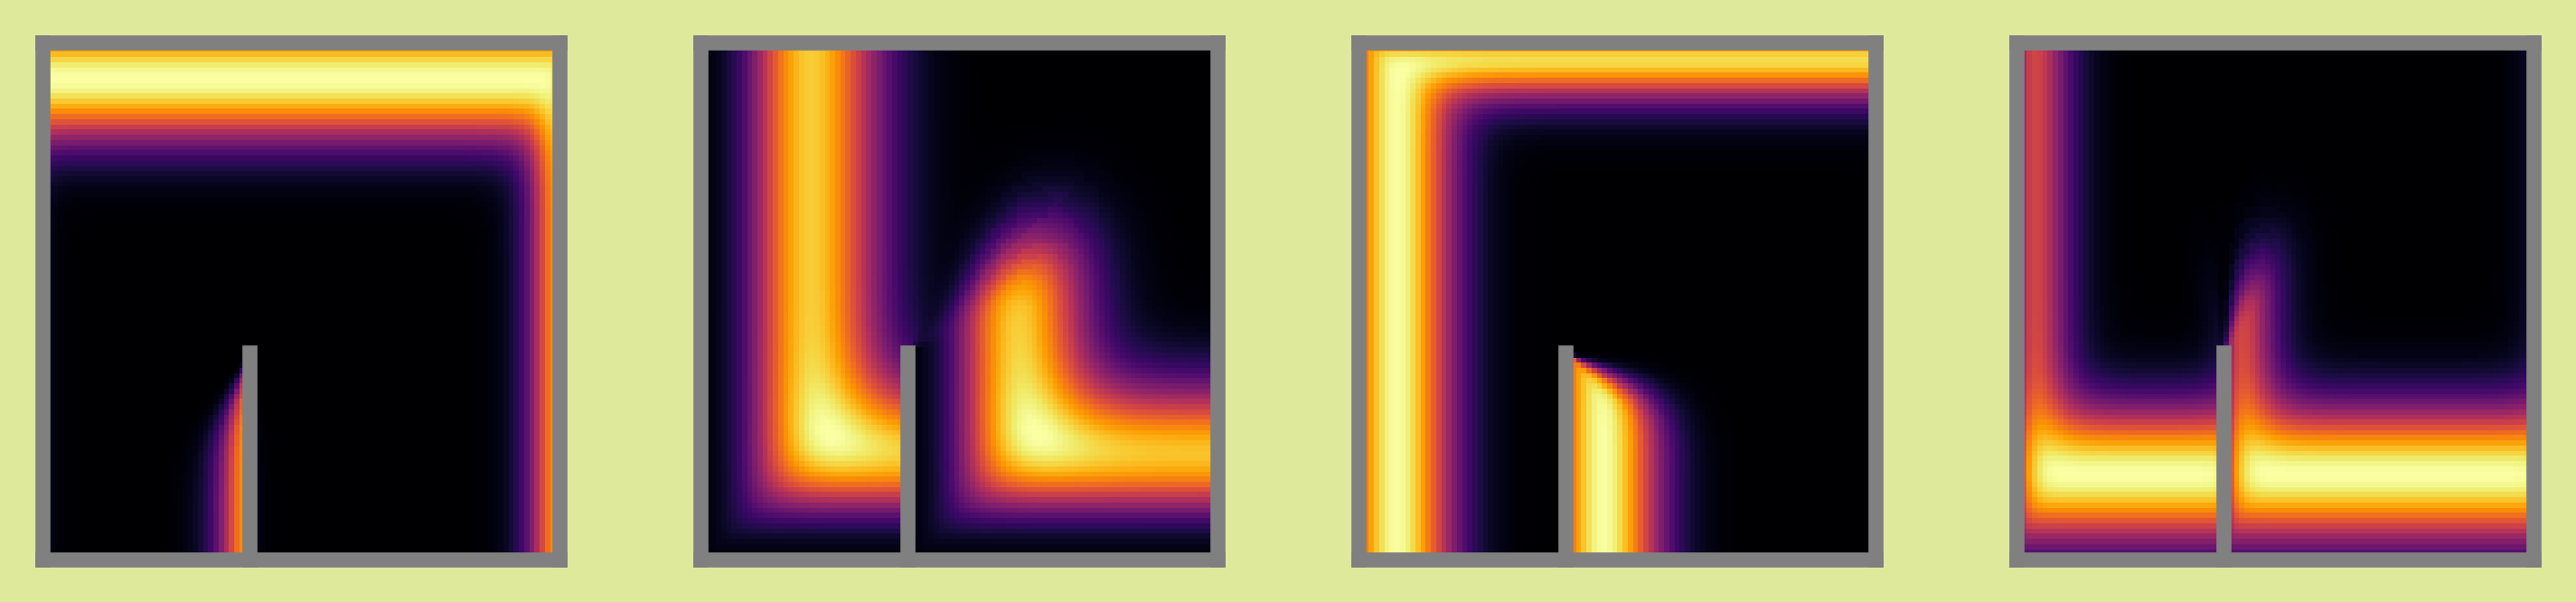

In [38]:
ratinabox.verbose=False
Env = Environment()
Env.add_wall(np.array([[0.4,0],[0.4,0.4]]))

Ag = Agent(
    params={'Environment':Env,
            }
)

PCs = PlaceCells(
    params={'Agent':Ag,
            'n':4,
            'description':'gaussian_threshold',
            'widths':0.4,
            'color':'C1'
            }
)

GCs = GridCells(
    params={'Agent':Ag,
            'n':4,
            'color':'C2'
            }
)

BVCs = BoundaryVectorCells(
    params={'Agent':Ag,
            'n':4,
            'color':'C3'
            }
)

VCs = VelocityCells(
    params={'Agent':Ag,
            'color':'C5'
            }
)

fig, ax = PCs.plot_rate_map()
# tpl.saveFigure(fig,'PCs')
fig, ax = GCs.plot_rate_map()
# tpl.saveFigure(fig,'GCs')
fig, ax = BVCs.plot_rate_map()
# tpl.saveFigure(fig,'BVCs')


In [40]:
for i in tqdm(range(int(60/Ag.dt))):
    Ag.update()
    PCs.update()
    GCs.update()
    BVCs.update()
    VCs.update()

100%|██████████| 6000/6000 [00:03<00:00, 1686.60it/s]


'../figures/220702/PCs_ts_2306'

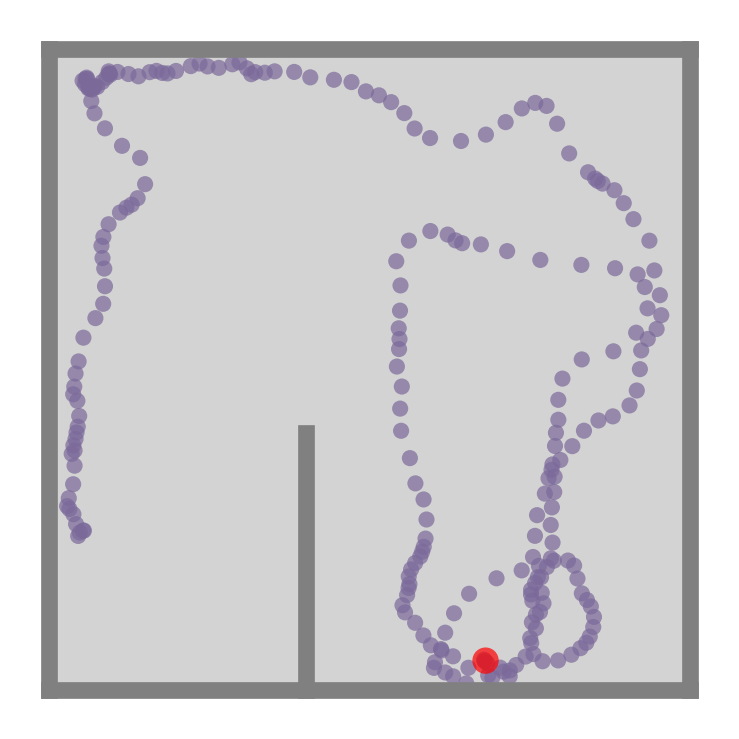

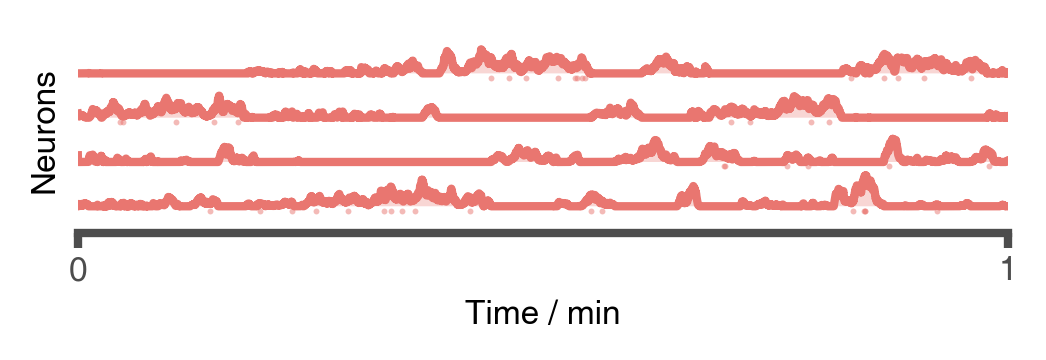

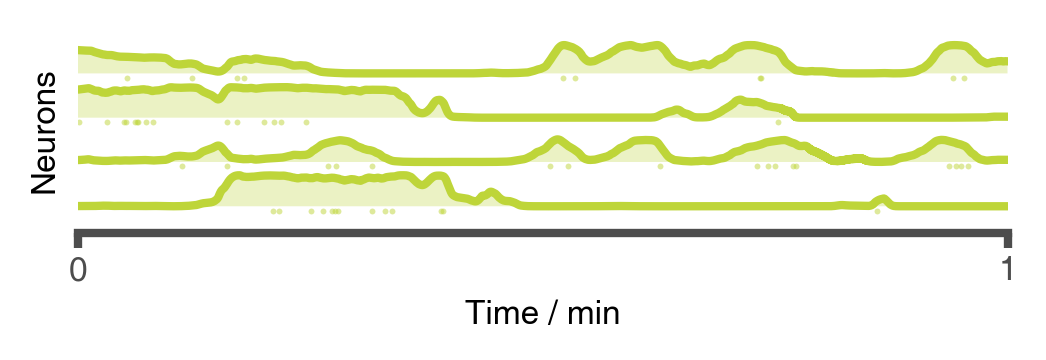

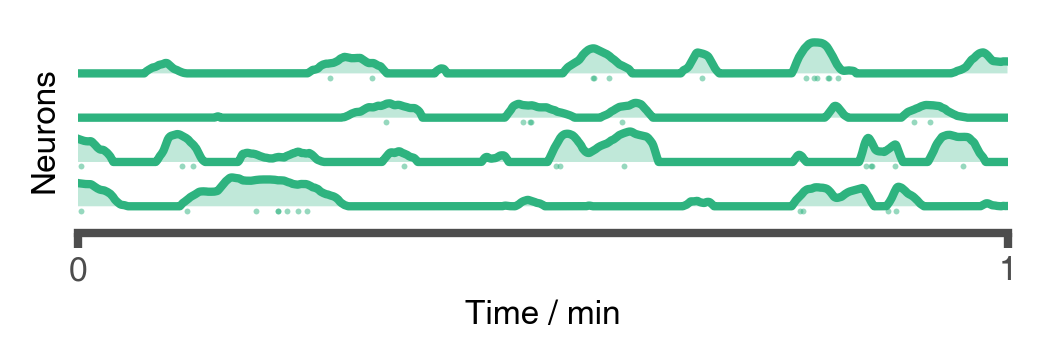

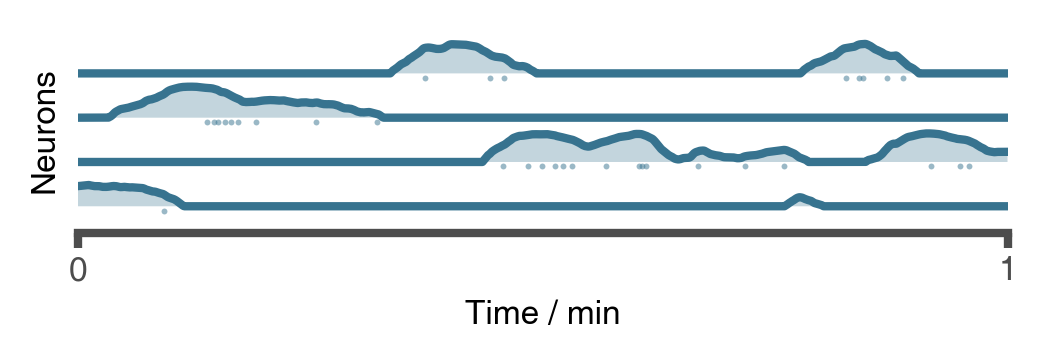

In [41]:
fig, ax = Ag.plot_trajectory()
# tpl.saveFigure(fig,'trajectory')

fig, ax = VCs.plot_rate_timeseries()
# tpl.saveFigure(fig,'VCs_ts')
fig, ax = BVCs.plot_rate_timeseries()
# tpl.saveFigure(fig,'BVCs_ts')
fig, ax = GCs.plot_rate_timeseries()
# tpl.saveFigure(fig,'GCs_ts')
fig, ax = PCs.plot_rate_timeseries()
# tpl.saveFigure(fig,'PCs_ts')



### Figure 1d



100%|██████████| 1000/1000 [00:01<00:00, 526.53it/s]


'../figures/220702/random_2306'

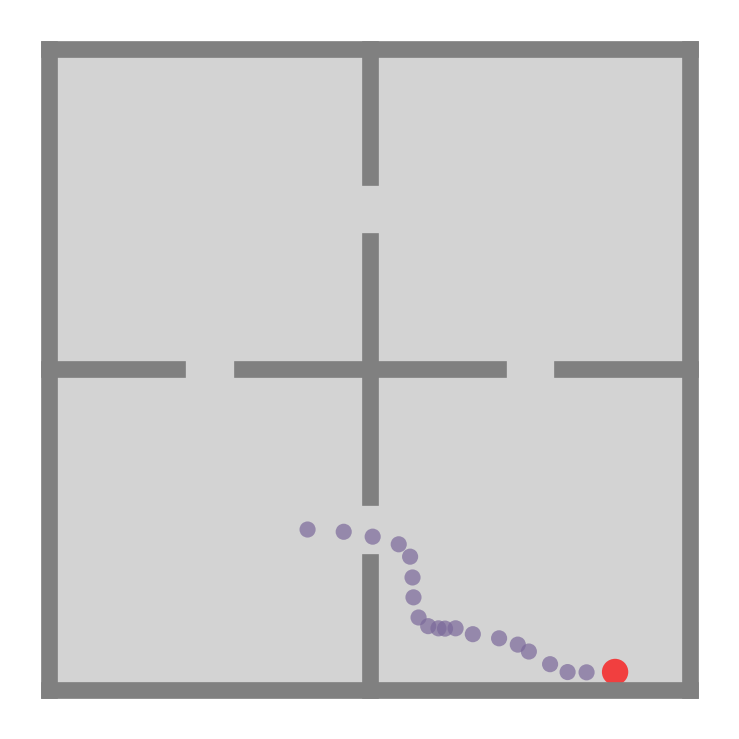

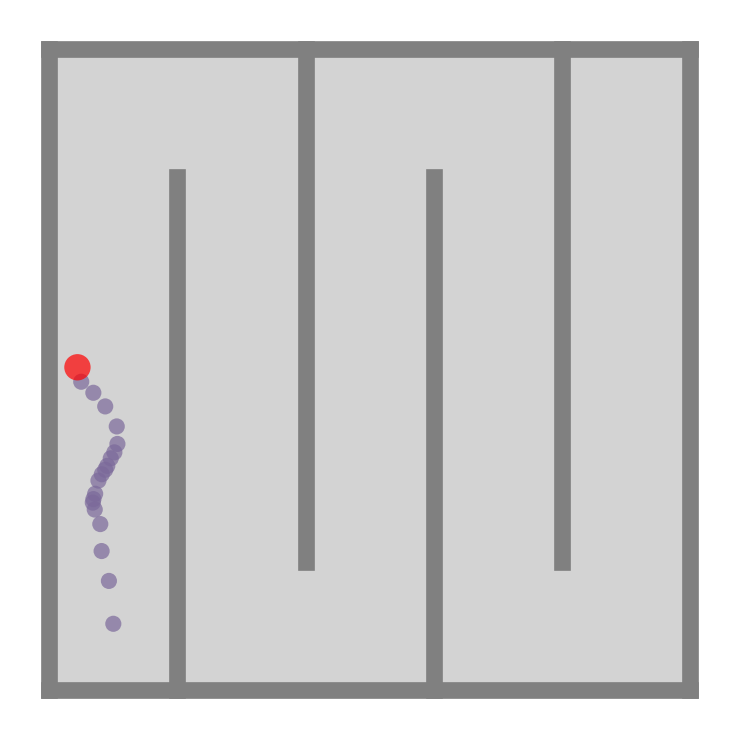

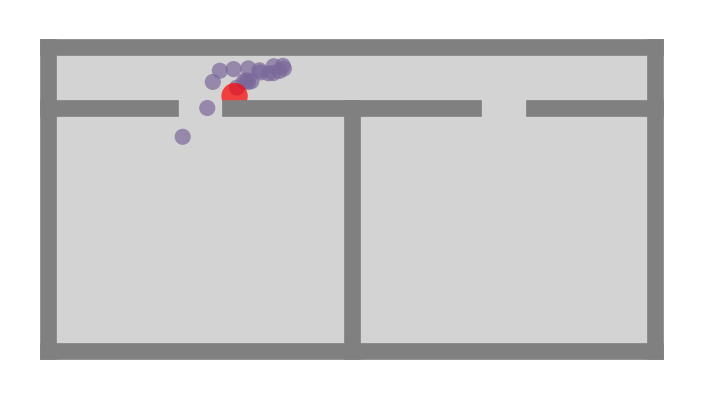

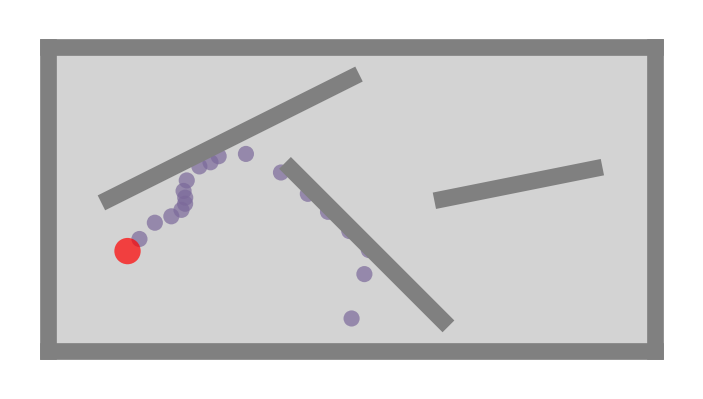

In [43]:
Env1 = Environment()
Env1.add_wall([[0,0.5],[0.2,0.5]])
Env1.add_wall([[0.3,0.5],[0.7,0.5]])
Env1.add_wall([[0.8,0.5],[1,0.5]])
Env1.add_wall([[0.5,0],[0.5,0.2]])
Env1.add_wall([[0.5,0.3],[0.5,0.7]])
Env1.add_wall([[0.5,0.8],[0.5,1]])
Ag1 = Agent(params={'Environment':Env1})
Ag1.pos = np.array([0.4,0.25])
Ag1.velocity = 0.3*np.array([1,0])


Env2 = Environment()
Env2.add_wall([[0.2,0],[0.2,0.8]])
Env2.add_wall([[0.4,1],[0.4,0.2]])
Env2.add_wall([[0.6,0],[0.6,0.8]])
Env2.add_wall([[0.8,1],[0.8,0.2]])
Ag2 = Agent(params={'Environment':Env2})
Ag2.pos = np.array([0.1,0.1])
Ag2.velocity = 0.3*np.array([0,1])


Env3 = Environment(params={'aspect':2,
                            'scale':0.5})                    
Env3.add_wall([[0.5,0],[0.5,0.4]])
Env3.add_wall([[0,0.4],[0.2,0.4]])
Env3.add_wall([[0.3,0.4],[0.7,0.4]])
Env3.add_wall([[0.8,0.4],[1,0.4]])
Ag3 = Agent(params={'Environment':Env3})
Ag3.pos = np.array([0.22,0.35])
Ag3.velocity = 0.3*np.array([0.5,1])


Env4 = Environment(params={'aspect':2,
                            'scale':0.5})
Env4.add_wall([[0.1,0.25],[0.5,0.45]])
Env4.add_wall([[0.4,0.3],[0.65,0.05]])
Env4.add_wall([[0.65,0.25],[0.9,0.3]])

Ag4 = Agent(params={'Environment':Env4})
Ag4.pos = np.array([0.5,0.05])
Ag4.velocity = 0.3*np.array([0,1])


train_time = 10
for i in tqdm(range(int(train_time/Ag1.dt))): 
    Ag1.update()
    Ag2.update()
    Ag3.update()
    Ag4.update()


fig1,ax1=Ag1.plot_trajectory(t_end=5)
# tpl.saveFigure(fig1,'fourroom')

fig2,ax2=Ag2.plot_trajectory(t_end=5)
# tpl.saveFigure(fig2,'hairpin')

fig3,ax3=Ag3.plot_trajectory(t_end=5)
# tpl.saveFigure(fig3,'tworoom')

fig4,ax4=Ag4.plot_trajectory(t_end=5)
# tpl.saveFigure(fig4,'random')

### Figure 1e

'../figures/220702/1Dtrajectory_2306'

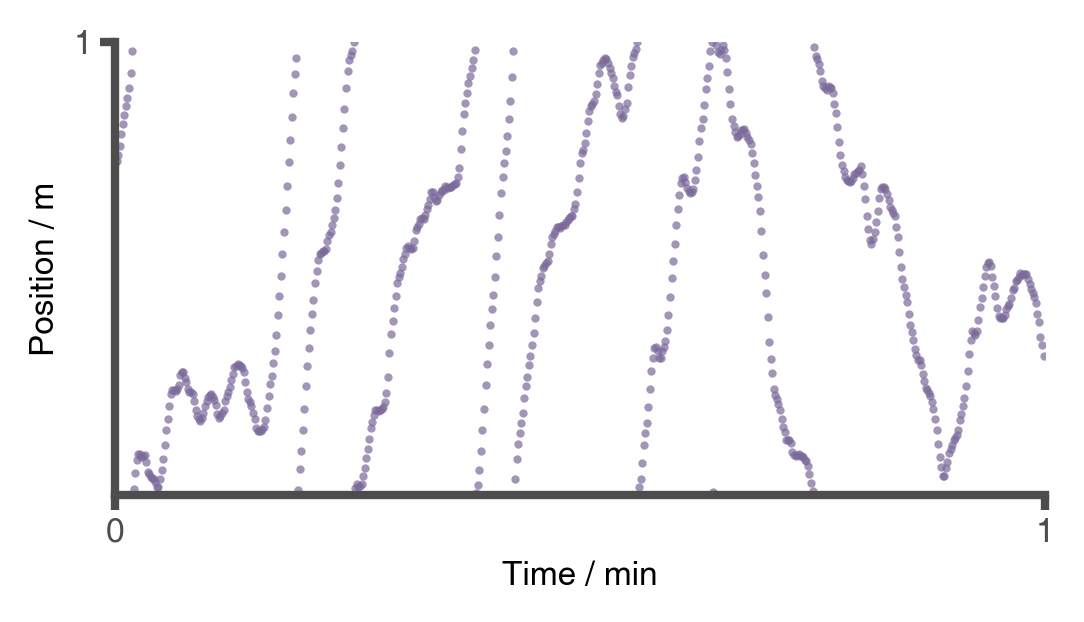

In [44]:
Env = Environment(params={'dimensionality':'1D',
                          'boundary_conditions':'periodic'})
Ag = Agent(
    params={'Environment':Env,
            'speed_mean':0.1,
            'speed_std':0.2}
)

for i in range(int(60/Ag.dt)):
    Ag.update()

fig, ax = Ag.plot_trajectory()
# tpl.saveFigure(fig,'1Dtrajectory')


## Figure 2

### Figure 2a
First we must import and analyze Sargolini et al 2006 locomotion data

In [22]:
from scipy import io
from scipy.optimize import curve_fit

def rayleigh(x,sigma,K):
    return K*x*np.e**(-x**2/(2*(sigma**2)))
def exponential(t,tau,K):
    return K*np.e**(-t/tau)
def gaussian(x,sigma,K):
    return K*np.e**(-x**2/(2*(sigma**2)))
def lagged_autocorrelation(t,x,max_t=10):
    from scipy.stats.stats import pearsonr
    R, T = [], []
    time, i = 0, 0
    while time < max_t:
        if i == 0:r = pearsonr(x,x)[0]
        else: r = pearsonr(x[i:],x[:-i])[0]
        i += 1
        T.append(t[i])
        R.append(r)
        time = t[i]
    return np.array(T), np.array(R)

#import data
mat = io.loadmat("../rawdata//8F6BE356-3277-475C-87B1-C7A977632DA7_1/11084-03020501_t2c1.mat")
x = ((mat['x1'] + mat['x2'])/2).reshape(-1)
y = ((mat['y1'] + mat['y2'])/2).reshape(-1)
t = (mat['t']).reshape(-1)
#remove nans 
y = y[np.logical_not(np.isnan(x))]
t = t[np.logical_not(np.isnan(x))]
x = x[np.logical_not(np.isnan(x))]
#normalise and put in metres
x = (x-min(x))/100
y = (y-min(y))/100
x = x + 0.5*(1-max(x))
y = y + 0.5*(1-max(y))
#downsample (so my code will later smooth it) (currently at 50Hz --> 2.5Hz)
x = x[::20]
y = y[::20]
t = t[::20]
#concatenate
pos = np.stack((x,y)).T
#make env, pass data to agent, and then upsample
Env = Environment()
Ag_s = Agent(Env)
Ag_s.dt = 10e-3
Ag_s.import_trajectory(times=t,positions=pos)
for i in tqdm(range(int(max(t)/Ag_s.dt))):
    Ag_s.update()

Successfully imported dataset from arrays passed


100%|██████████| 59936/59936 [00:07<00:00, 7516.81it/s]


best Rayleigh sigma: 0.08065175988445959
best gaussian sigma: 125.02462284794603
best tau for speed is: 0.7243065136224692
best tau for rotational_vel is: 0.08711967797623174


(0.11999999999999998, 4.0)

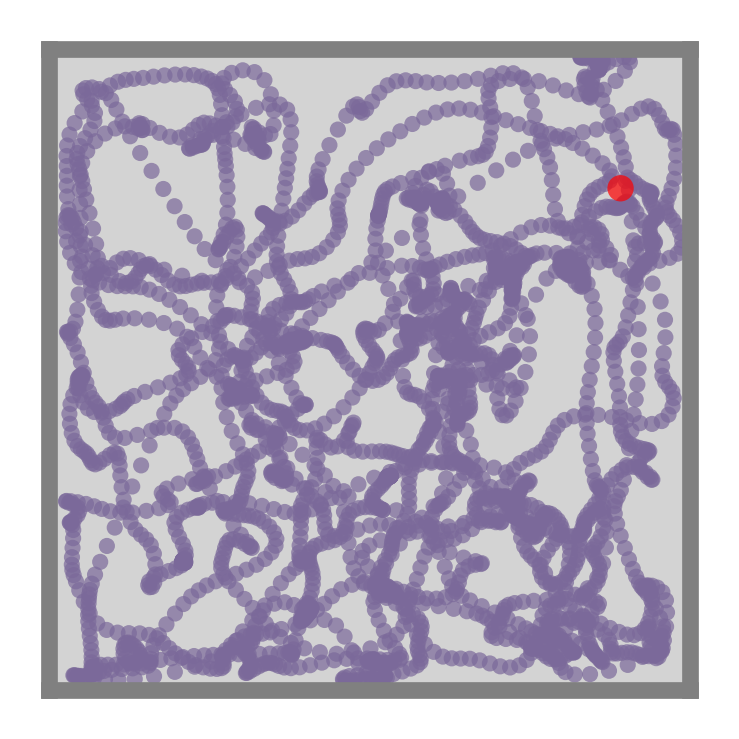

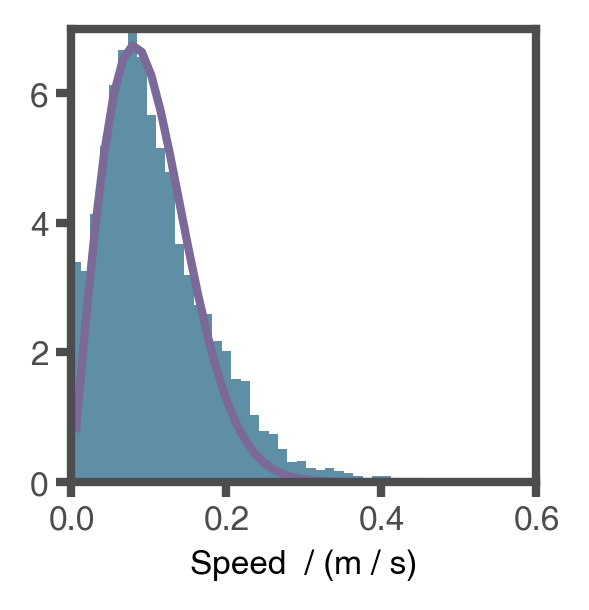

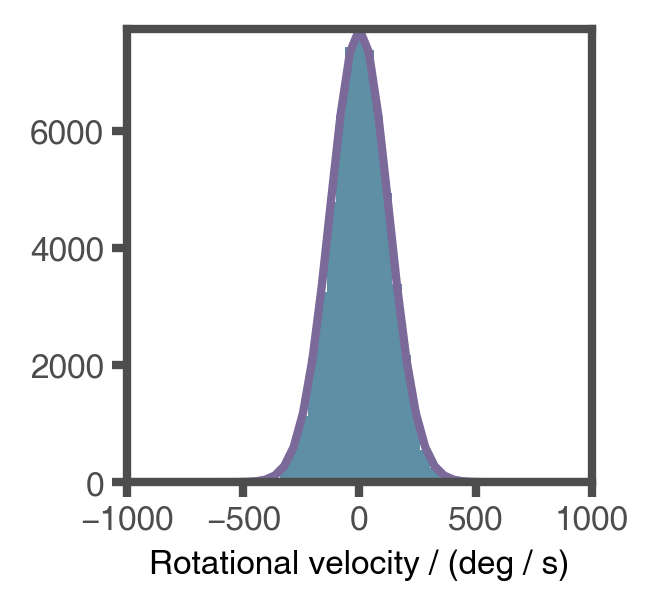

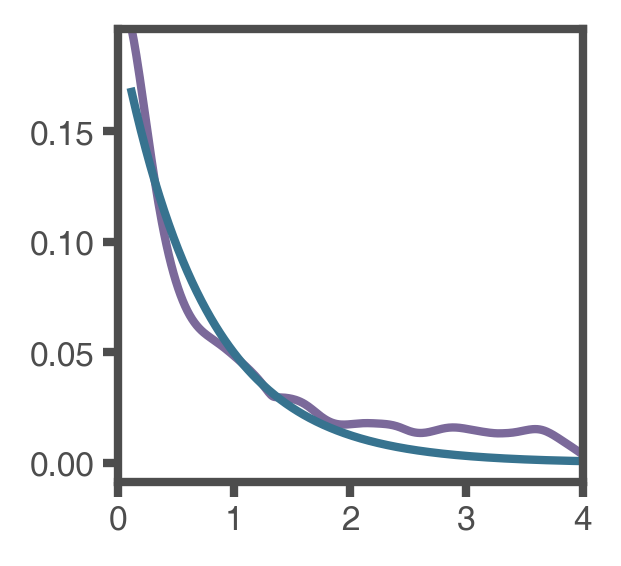

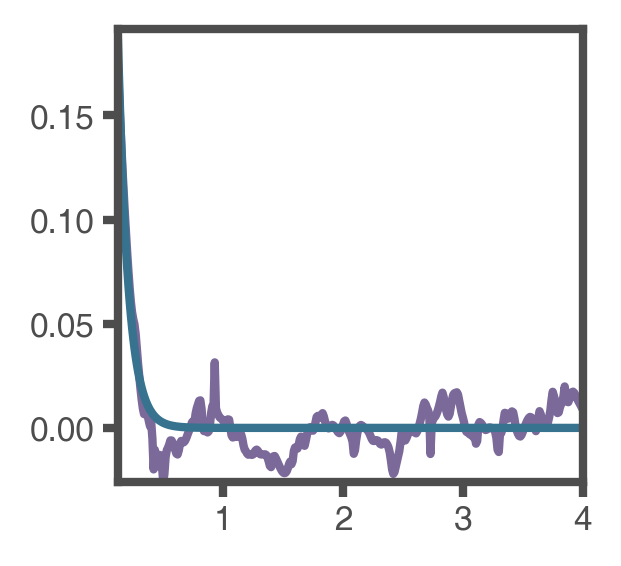

In [24]:
#plot sargolini trajectory
fig, ax = Ag_s.plot_trajectory(t_end=5*60)
# tpl.saveFigure(fig,'sarg_trajectory')


#plot sargolini speed histogram 
fig, ax, y_v, x_v, patches = Ag_s.plot_histogram_of_speeds(return_data=True)
ax.set_xlim(right=0.6)
x_v = (x_v[1:]+x_v[:-1])/2
sigma, K = curve_fit(rayleigh,x_v,y_v)[0]
print("best Rayleigh sigma:",sigma)
y_fit = rayleigh(x_v,sigma,K)
ax.plot(x_v,y_fit)
# tpl.xyAxes(ax)
# tpl.saveFigure(fig,'sarg_rayleigh')


#plot sargolini rotational speed histogram 
fig, ax, y_v, x_v, patches = Ag.plot_histogram_of_rotational_velocities(return_data=True)
ax.set_xlim(left=-1000,right=1000)
x_v = (x_v[1:]+x_v[:-1])/2
sigma, K = curve_fit(gaussian,x_v,y_v,p0=np.array([1000,500]))[0]
print("best gaussian sigma:",sigma)
y_fit = gaussian(x_v,sigma,K)
ax.plot(x_v,y_fit)
# tpl.xyAxes(ax)
# tpl.saveFigure(fig,'sarg_normal')



t = np.array(Ag_s.history['t'])
speed = np.linalg.norm(np.array(Ag_s.history['vel']),axis=1)
speed = (speed - np.mean(speed))/np.std(speed)
lag, speed_autocorr = lagged_autocorrelation(t,speed)
lag = lag[10:]
speed_autocorr = speed_autocorr[10:]
fig, ax = plt.subplots()
ax.plot(lag,speed_autocorr)
tau, K = curve_fit(exponential,lag,speed_autocorr)[0]
print("best tau for speed is:",tau)
y_fit = exponential(lag,tau,K)
ax.plot(lag,y_fit)
ax.set_xlim(left=0,right=4)
# tpl.xyAxes(ax)
# tpl.saveFigure(fig,'sarg_speedac')





rot_vel = np.array(Ag_s.history['rot_vel'])
rot_vel = (rot_vel - np.mean(rot_vel))/np.std(rot_vel)
lag, rot_vel_autocorr = lagged_autocorrelation(t,rot_vel)
lag = lag[10:]
rot_vel_autocorr = rot_vel_autocorr[10:]
fig, ax = plt.subplots()
ax.plot(lag,rot_vel_autocorr)
tau, K = curve_fit(exponential,lag,rot_vel_autocorr)[0]
print("best tau for rotational_vel is:",tau)
y_fit = exponential(lag,tau,K)
ax.plot(lag,y_fit)
ax.set_xlim(right=4)
# tpl.xyAxes(ax)
# tpl.saveFigure(fig,'sarg_rotac')



### Figure 2b 
(the `RatInABox' version of the sargolini data )

In [25]:
Env = Environment(params={'scale':1})
Ag_r = Agent(Env,params={'anxiety':0.6,})
Ag_r.dt = 10e-3
for i in tqdm(range(int(600/Ag_r.dt))):
    Ag_r.update()

100%|██████████| 60000/60000 [00:29<00:00, 2067.95it/s]


best tau for speed is: 0.6858569143660115
best tau for rotational_vel is: 0.061751253938079766


(0.11999999999999998, 4.0)

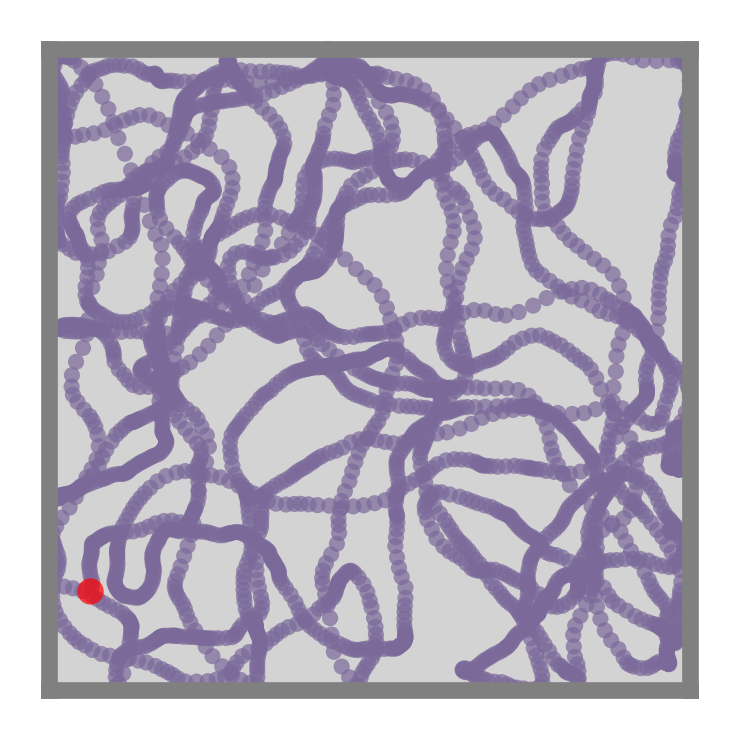

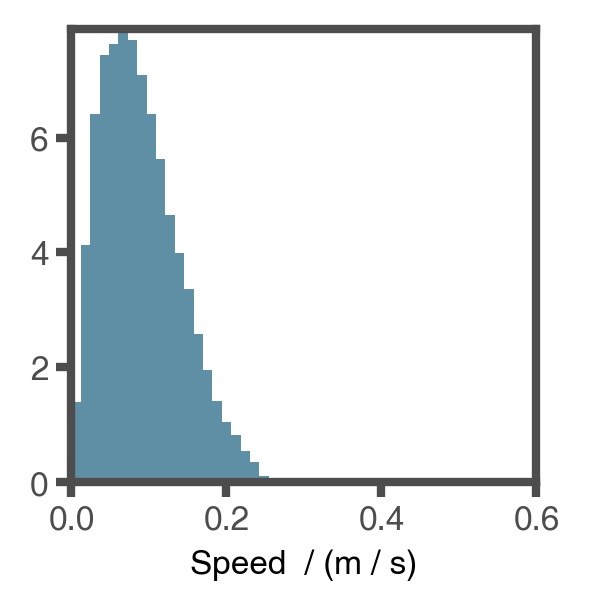

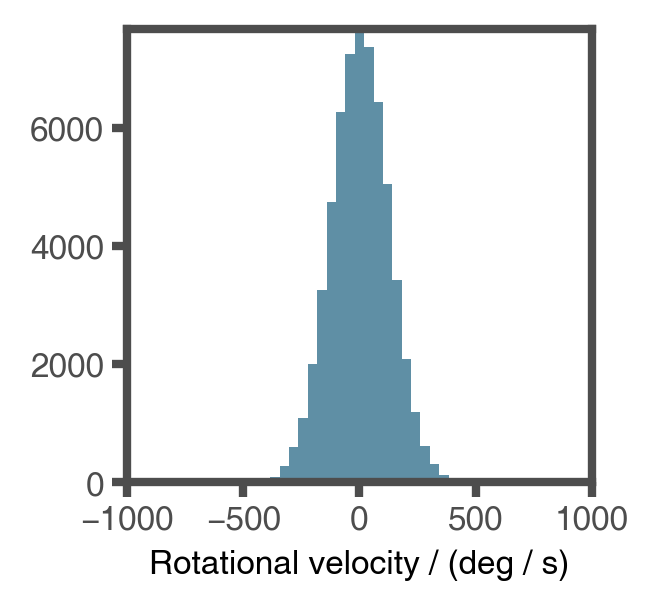

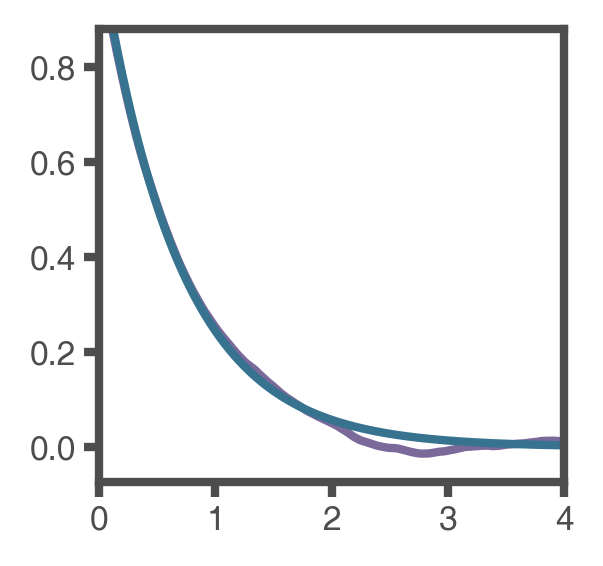

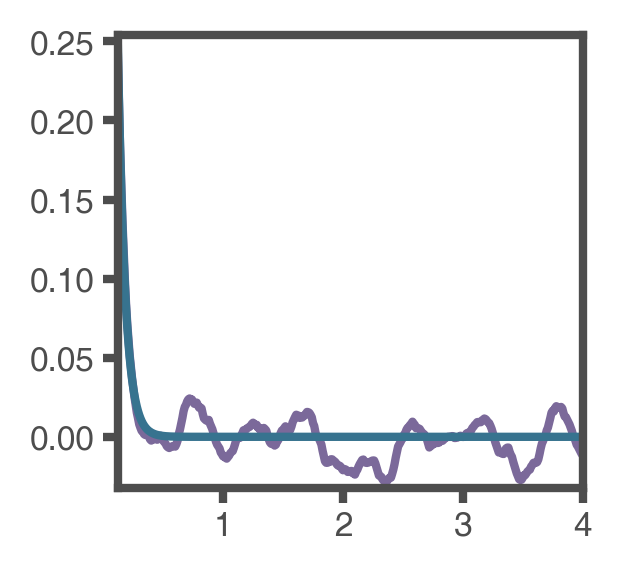

In [26]:
fig, ax = Ag_r.plot_trajectory(t_end = 60*5)
# tpl.saveFigure(fig,'riab_trajectory')

fig, ax = Ag_r.plot_histogram_of_speeds()
ax.set_xlim(0,0.60)
# tpl.xyAxes(ax)
# tpl.saveFigure(fig,'riab_rayleigh')

fig, ax = Ag_r.plot_histogram_of_rotational_velocities()
ax.set_xlim(-1000,1000)
# tpl.xyAxes(ax)
# tpl.saveFigure(fig,'riab_normal')

t = np.array(Ag_r.history['t'])
speed = np.linalg.norm(np.array(Ag_r.history['vel']),axis=1)
speed = (speed - np.mean(speed))/np.std(speed)
lag, speed_autocorr = lagged_autocorrelation(t,speed)
lag = lag[10:]
speed_autocorr = speed_autocorr[10:]
fig, ax = plt.subplots()
ax.plot(lag,speed_autocorr)
tau, K = curve_fit(exponential,lag,speed_autocorr)[0]
print("best tau for speed is:",tau)
y_fit = exponential(lag,tau,K)
ax.plot(lag,y_fit)
ax.set_xlim(left=0,right=4)
# tpl.xyAxes(ax)
# tpl.saveFigure(fig,'riab_speedac')

rot_vel = np.array(Ag_r.history['rot_vel'])
rot_vel = (rot_vel - np.mean(rot_vel))/np.std(rot_vel)
lag, rot_vel_autocorr = lagged_autocorrelation(t,rot_vel)
lag = lag[10:]
rot_vel_autocorr = rot_vel_autocorr[10:]
fig, ax = plt.subplots()
ax.plot(lag,rot_vel_autocorr)
tau, K = curve_fit(exponential,lag,rot_vel_autocorr)[0]
print("best tau for rotational_vel is:",tau)
y_fit = exponential(lag,tau,K)
ax.plot(lag,y_fit)
ax.set_xlim(right=4)
# tpl.xyAxes(ax)
# tpl.saveFigure(fig,'riab_rotac')


### Figure 2c

In [50]:
Env = Environment()
Ag1 = Ag = Agent(params={'Environment':Env,
                         'anxiety':0.8,})
Ag2 = Ag = Agent(params={'Environment':Env,
                         'anxiety':0.2,})

Ag1.dt=100e-3
Ag2.dt=100e-3

for i in tqdm(range(int(90*60/Ag1.dt))):
    Ag1.update()
    Ag2.update()

100%|██████████| 54000/54000 [00:48<00:00, 1104.34it/s]


'../figures/220702/chill_2317'

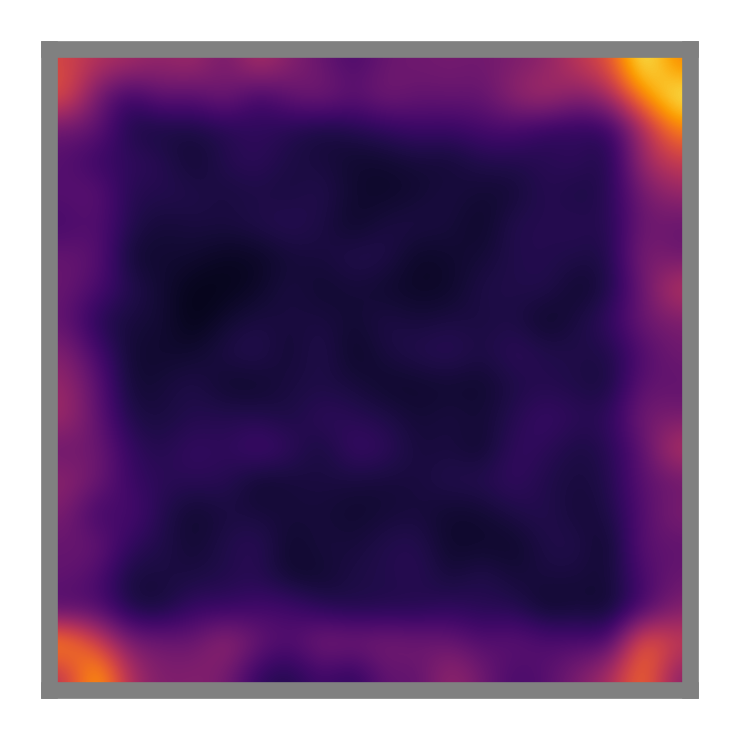

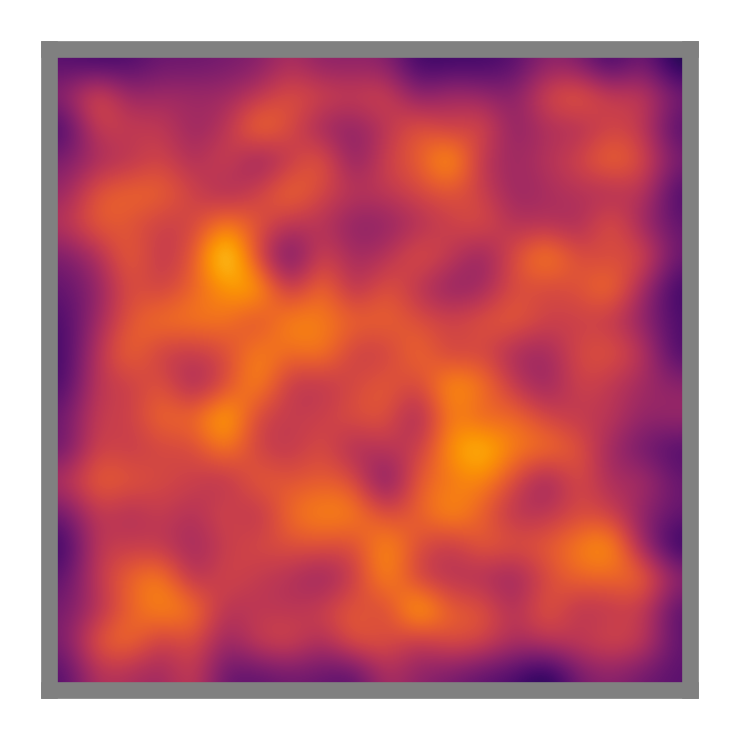

In [51]:
fig, ax = Ag1.plot_position_heatmap()
# tpl.saveFigure(fig,'anxious')
fig, ax = Ag2.plot_position_heatmap()
# tpl.saveFigure(fig,'chill')

## Figure 3

### Figure 3a

Successfully imported dataset from arrays passed
Successfully imported dataset from arrays passed


100%|██████████| 2563/2563 [00:00<00:00, 5786.40it/s]


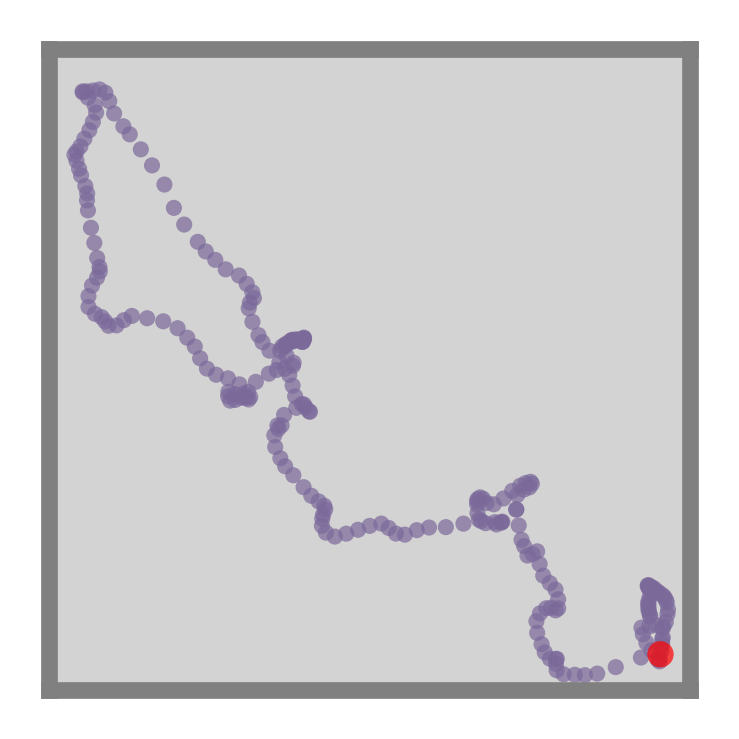

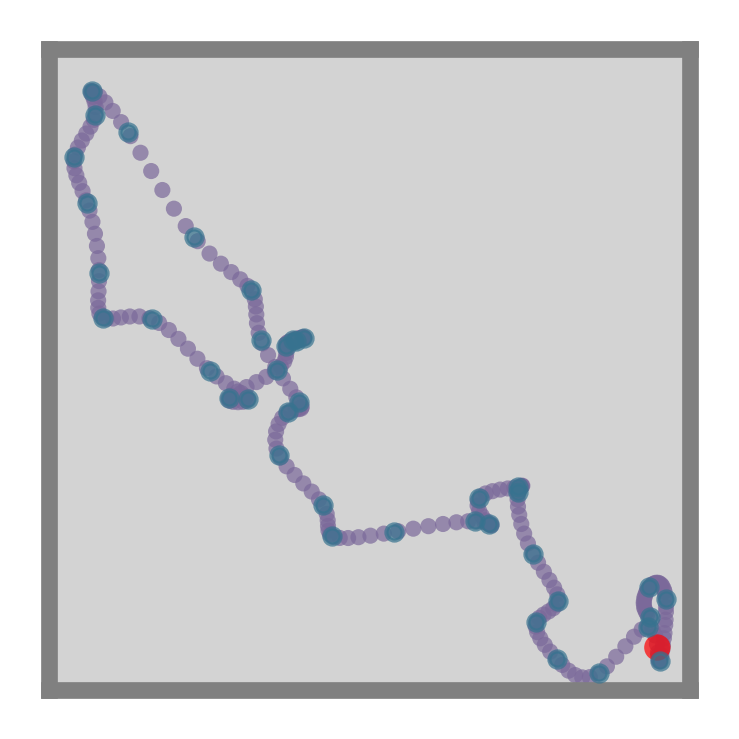

In [20]:
#import data
from scipy import io 
mat = io.loadmat("../rawdata//8F6BE356-3277-475C-87B1-C7A977632DA7_1/11084-03020501_t2c1.mat")
x = ((mat['x1'] + mat['x2'])/2).reshape(-1)
y = ((mat['y1'] + mat['y2'])/2).reshape(-1)
t = (mat['t']).reshape(-1)
#remove nans 
y = y[np.logical_not(np.isnan(x))]
t = t[np.logical_not(np.isnan(x))]
x = x[np.logical_not(np.isnan(x))]
#normalise and put in metres
x = (x-min(x))/100
y = (y-min(y))/100
x = x + 0.5*(1-max(x))
y = y + 0.5*(1-max(y))
#save_data
pos = np.stack((x,y)).T
np.savez("../data/sargolini.npz",t=t,pos=pos)
#data is 10 mins, we want 10 secs
startid = 100
x = x[startid:startid+int(len(x)/25)]
y = y[startid:startid+int(len(y)/25)]
t = t[startid:startid+int(len(t)/25)]
#downsample (so my code will later smooth it) (currently at 50Hz --> 2.5Hz)
x_ds = x[::30]
y_ds = y[::30]
t_ds = t[::30]
#concatenate
pos = np.stack((x,y)).T
pos_ds = np.stack((x_ds,y_ds)).T

Env = Environment()
Ag1 = Agent(Env)
Ag2 = Agent(Env)
Ag1.import_trajectory(times=t,positions=pos)
Ag2.import_trajectory(times=t_ds,positions=pos_ds)

for i in tqdm(range(int(t_ds[-1]/Ag2.dt))):
    Ag1.update()
    Ag2.update()

fig, ax = Ag1.plot_trajectory()
# tpl.saveFigure(fig,'imported')
fig, ax = Ag2.plot_trajectory()
ax.scatter(x_ds,y_ds,c='C1',s=15,linewidth=1,zorder=11,alpha=0.7)
# tpl.saveFigure(fig,'upsampled')

### Figure 3b

In [73]:
Env = Environment()
# Env.add_wall(np.array([[0.25,0.5],[0.75,0.5]]))
Ag = Agent(params={'Environment':Env})

Ntest = 10
PCs = PlaceCells(
    params={'Agent':Ag,
            'n':Ntest,
            'description':'gaussian_threshold',
            'widths':0.4,
            'color':'C1'
            }
)

GCs = GridCells(
    params={'Agent':Ag,
            'n':Ntest,
            'color':'C2'
            }
)

BVCs = BoundaryVectorCells(
    params={'Agent':Ag,
            'n':Ntest,
            'color':'C3',
            }
)


AttributeError: 'BoundaryVectorCells' object has no attribute 'copy'

In [61]:
import time 

motion = []
pc = []
gc = []
bvc = []
matmul = []
inverse = []
 
for i in tqdm(range(400)):
    t0 = time.time()
    Ag.update()
    t1 = time.time()
    motion.append(t1-t0)

    t0 = time.time()
    PCs.update()
    t1 = time.time()
    pc.append(t1-t0)

    t0 = time.time()
    GCs.update()
    t1 = time.time()
    gc.append(t1-t0)

    t0 = time.time()
    BVCs.update()
    t1 = time.time()
    bvc.append(t1-t0)

    a = np.random.normal(size=(Ntest,))
    b = np.random.normal(size=(Ntest,Ntest))
    t0 = time.time()
    c = np.matmul(b,a)
    t1 = time.time()
    matmul.append(t1-t0)

    a = np.random.normal(size=(Ntest,Ntest))
    t0 = time.time()
    b = np.linalg.inv(a)
    t1 = time.time()
    inverse.append(t1-t0)

motion = np.array(motion)
pc = np.array(pc)
gc = np.array(gc)
bvc = np.array(bvc)
matmul = np.array(matmul)
inverse = np.array(inverse)



100%|██████████| 400/400 [00:01<00:00, 249.59it/s]


'../figures/220702/clocktimes_2318_1'

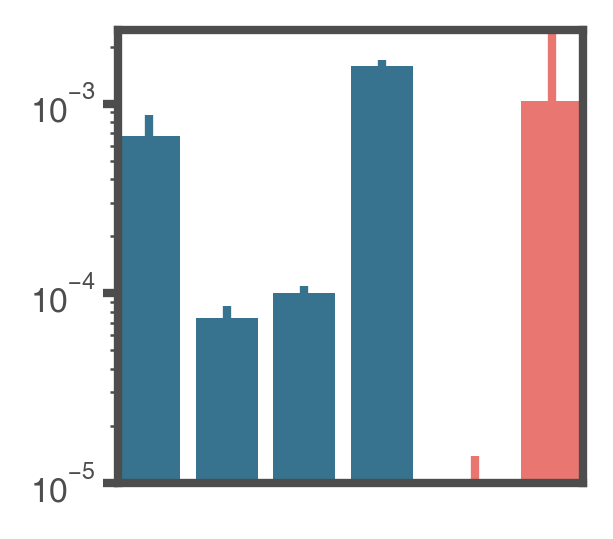

In [62]:
positions = [1,2,3,4,5.2,6.2]
heights = [motion.mean(),pc.mean(),gc.mean(),bvc.mean(),matmul.mean(),inverse.mean()]
uncertainties = [motion.std(),pc.std(),gc.std(),bvc.std(),matmul.std(),inverse.std()]
color = ['C1','C1','C1','C1','C5','C5']

fig, ax = plt.subplots()
ax.bar(positions,heights,color=color,yerr=uncertainties,ecolor=color)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-5)
ax.set_xticks([])
tpl.saveFigure(fig,'clocktimes')


## Demonstrating all plotting functions

In [33]:
Env = Environment()
Env.add_wall(np.array([[0.3,0],[0.3,0.4]]))
Ag = Agent(Env)
Ag.dt = 50e-3
PCs = PlaceCells(Ag,params={'n':100})
GCs = GridCells(Ag,params={'n':3,'color':None},)
BVCs = BoundaryVectorCells(Ag,params={'n':3,'color':None})

Env1D = Environment(params={'dimensionality':'1D'})
Ag1D = Agent(Env1D,params={'speed_mean':0.0})
Ag1D.dt = 50e-3
PCs1D = PlaceCells(Ag1D,params={'n':10,
                            'widths':0.2})

for i in tqdm(range(int(30*60/Ag.dt))):
    Ag.update()
    PCs.update()
    GCs.update()
    BVCs.update()

    Ag1D.update()
    PCs1D.update()

100%|██████████| 36000/36000 [00:52<00:00, 682.45it/s]


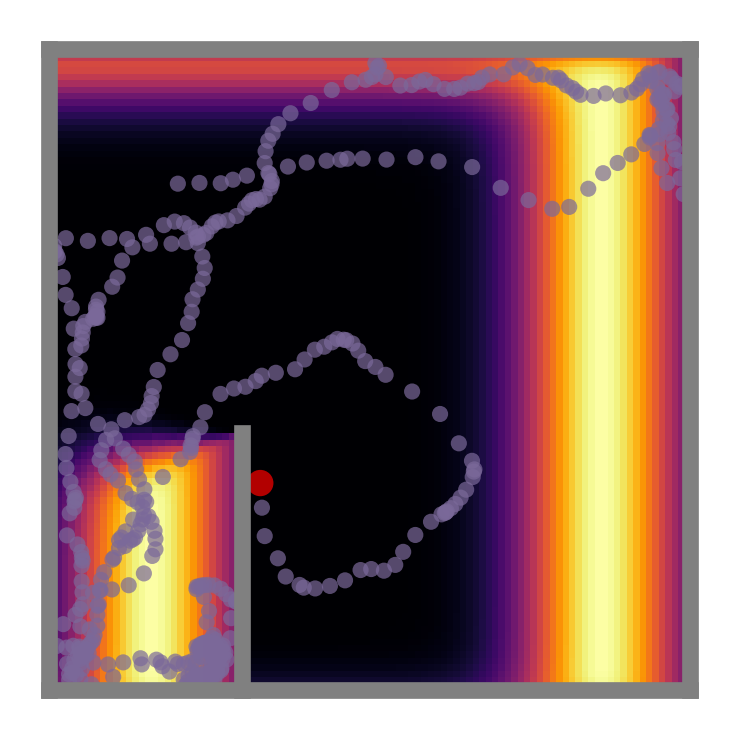

In [39]:
fig, ax = Env.plot_environment()
plt.savefig("../figures/plotting_examples_save/plot_env.svg")
fig, ax = Env1D.plot_environment()
plt.savefig("../figures/plotting_examples_save/plot_env_1D.svg")

fig, ax = Ag.plot_trajectory(t_end=120)
plt.savefig("../figures/plotting_examples_save/plot_traj.svg")
fig, ax = Ag1D.plot_trajectory(t_end=120)
plt.savefig("../figures/plotting_examples_save/plot_traj_1D.svg")

fig, ax = Ag.plot_position_heatmap()
plt.savefig("../figures/plotting_examples_save/plot_heatmap.svg")
fig, ax = Ag1D.plot_position_heatmap()
plt.savefig("../figures/plotting_examples_save/plot_heatmap_1D.svg")

fig, ax = Ag.plot_histogram_of_speeds()
plt.savefig("../figures/plotting_examples_save/plot_histogram_speed.svg")

fig, ax = Ag.plot_histogram_of_rotational_velocities()
plt.savefig("../figures/plotting_examples_save/plot_histogram_rotvel.svg")



fig, ax = GCs.plot_rate_map()
plt.savefig("../figures/plotting_examples_save/gc_plotrm.svg")
fig, ax = PCs1D.plot_rate_map()
plt.savefig("../figures/plotting_examples_save/pc1d_plotrm.svg")

fig, ax = GCs.plot_rate_map(method='history')
plt.savefig("../figures/plotting_examples_save/gc_plotrm_history.svg")
fig, ax = PCs1D.plot_rate_map(method='history')
plt.savefig("../figures/plotting_examples_save/pc1d_plotrm_history.svg")

fig, ax = GCs.plot_rate_map(method='neither',spikes=True)
plt.savefig("../figures/plotting_examples_save/gc_plotrm_spikes.svg")
fig, ax = PCs1D.plot_rate_map(method='neither',spikes=True)
plt.savefig("../figures/plotting_examples_save/pc1d_plotrm_spikes.svg")



fig, ax = GCs.plot_rate_timeseries(t_end=120)
plt.savefig("../figures/plotting_examples_save/gc_plotrts.svg")


PCs.plot_place_cell_locations()
plt.savefig("../figures/plotting_examples_save/pc_locations.svg")

BVCs.plot_BVC_receptive_field()
plt.savefig("../figures/plotting_examples_save/bvc_rfs.svg")

fig, ax = BVCs.plot_rate_map(chosen_neurons="1")
fig, ax = Ag.plot_trajectory(t_end=120,fig=fig,ax=ax[0])
plt.savefig("../figures/plotting_examples_save/trajectory_on_ratemap.svg")

